In [2]:
%matplotlib inline

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.constants as const
c = const.c.cgs.value

In [331]:
# BHR71
# corrected = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/bhr71_spire_corrected.fits'
corrected = '/Users/yaolun/bhr71/bhr71_SECT/spire_bhr71_corrected_32asGRB.fits'
extended = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_extended_apod.fits'
point = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
corrected_16as = '/Users/yaolun/bhr71/bhr71_SECT/bhr71_16as_beam.fits'

# L1157
# corrected = '/Users/yaolun/test/L1157/l1157_spire_corrected.fits'
# extended = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_extended_apod.fits'
# point = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_point_apod.fits'

hdu_corrected = fits.open(corrected) # SLWC3:  2; SSWD4:  3 for BHR71; for others, SLWC3: 5, SSWD4: 18 
hdu_extended = fits.open(extended)   # SLWC3: 11; SSWD4: 39
hdu_point = fits.open(point)         # SLWC3:  5; SSWD4: 18
hdu_16as = fits.open(corrected_16as)

pix_slw = np.pi/4.*34**2
pix_ssw = np.pi/4.*19**2

# get the spectra from FITS file
# BHR71
wl_slw_cor = c/1e5/hdu_corrected[2].data.field(0)[3:-3]
flux_slw_cor = hdu_corrected[2].data.field(1)[3:-3]
wl_ssw_cor = c/1e5/hdu_corrected[3].data.field(0)[3:-3]
flux_ssw_cor = hdu_corrected[3].data.field(1)[3:-3]
# other
# wl_slw_cor = c/1e5/hdu_corrected[5].data.field(0)[3:-3]
# flux_slw_cor = hdu_corrected[5].data.field(1)[3:-3]
# wl_ssw_cor = c/1e5/hdu_corrected[18].data.field(0)[3:-3]
# flux_ssw_cor = hdu_corrected[18].data.field(1)[3:-3]

wl_slw_16as = c/1e5/hdu_16as[2].data.field(0)[3:-3]
flux_slw_16as = hdu_16as[2].data.field(1)[3:-3]
wl_ssw_16as = c/1e5/hdu_16as[3].data.field(0)[3:-3]
flux_ssw_16as = hdu_16as[3].data.field(1)[3:-3]

wl_slw_ext = c/1e5/hdu_extended[11].data.field(0)
flux_slw_ext = hdu_extended[11].data.field(1)*pix_slw*(np.pi/180./3600.)**2*1e26
wl_ssw_ext = c/1e5/hdu_extended[39].data.field(0)
flux_ssw_ext = hdu_extended[39].data.field(1)*pix_ssw*(np.pi/180./3600.)**2*1e26

wl_slw_pot = c/1e5/hdu_point[5].data.field(0)
flux_slw_pot = hdu_point[5].data.field(1)
wl_ssw_pot = c/1e5/hdu_point[18].data.field(0)
flux_ssw_pot = hdu_point[18].data.field(1)

In [117]:
# read PACS spectrum
wl_pacs, flux_pacs = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',\
                                   skip_header=1).T

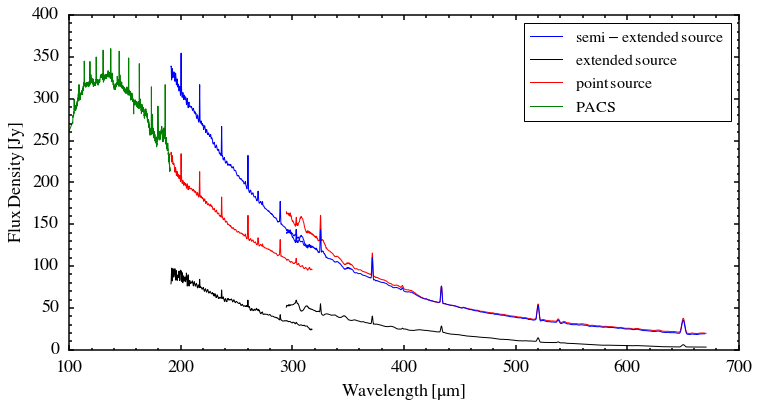

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ext, = ax.plot(wl_slw_ext, flux_slw_ext, 'k-', linewidth=1)
ax.plot(wl_ssw_ext, flux_ssw_ext, 'k-', linewidth=1)
pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', linewidth=1)
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-', linewidth=1)
cor, = ax.plot(wl_slw_cor, flux_slw_cor, 'b-', linewidth=1)
ax.plot(wl_ssw_cor, flux_ssw_cor, 'b-', linewidth=1)
# cor_16as, = ax.plot(wl_slw_16as, flux_slw_16as, '-', color='Magenta', linewidth=1)
# ax.plot(wl_ssw_16as, flux_ssw_16as, '-', color='Magenta', linewidth=1)

# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', linewidth=1)

ax.legend([cor, ext, pot, pacs], \
          [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$'],\
          numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_correction_com.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Experiment about SPIRE point source corrected datacube

In [7]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

In [113]:
# SLW
wl_slw_sum = c/1e5/hdu[2].data.field(0)
flux_slw_sum = np.zeros_like(hdu[2].data.field(1))
for i in range(2,9):
    flux_slw_sum += hdu[i].data.field(1)
    
# SSW
wl_ssw_sum = c/1e5/hdu[13].data.field(0)
flux_ssw_sum = np.zeros_like(hdu[13].data.field(1))
for i in [13,14,17,18,21,22]:
    flux_ssw_sum += hdu[i].data.field(1)

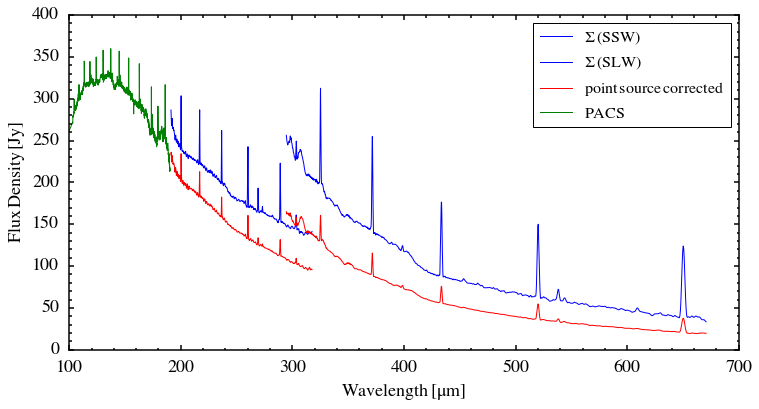

In [11]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-')
# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)


## Weight the SPIRE spaxel based on a reference Gaussian beam with an equivalent aperture of PACS 3x3 aperture

### SSW

In [298]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

# read in the SSW beam profile
wl_ssw_beam, diam_ssw_beam = np.genfromtxt('/Users/yaolun/test/SSW_beam_profile.txt').T

from scipy.interpolate import interp1d
f = interp1d(wl_ssw_beam, diam_ssw_beam)

# A re-sample function
def resample(x, skip=1, freq=False):
    # need to resample in frequency space
    import astropy.constants as const
    c = const.c.cgs.value
    # assume x in um
    if not freq:
        x = c/x
    xx = []
    for i in range(len(x)):
        if i % skip == 0:
            xx.append(x[i])
    if not freq:
        xx = c/np.array(xx)
    return xx

# Numerically Gaussian integral within a certain aperture at a given location
def Gaussian_anywhere(ra_offset, dec_offset, radius, size=701., phys_size=70.):
    # Create a 2-D cartian grid for mapping 2-D Gaussian
    def gauss2d(x, y, sigmax, sigmay=None):
        # sigmax needs to be in pixel coordinates
        if sigmay == None:
            sigmay = sigmax
        return 1/(2*np.pi*sigmax*sigmay) * np.exp( -(x**2/2./sigmax**2 + y**2/2./sigmay**2) )
    
    grid_x, grid_y = np.meshgrid(np.linspace(0,size-1,size), np.linspace(0,size-1,size))
    grid_x = grid_x - (size-1)/2.
    grid_y = grid_y - (size-1)/2.
    grid_gauss2d = gauss2d(grid_x,grid_y, sigmax=(size-1)/phys_size*13.5)
    dA = ((1/((size-1)/2.))*phys_size)**2

    # convert from physcial coordinates to pixel coordinates
    x = (ra_offset-phys_size/2.) * (size-1)/2./(phys_size/2.) + (size-1)/2.
    y = (dec_offset-phys_size/2.) * (size-1)/2./(phys_size/2.) + (size-1)/2.
    r_pix = radius * (size-1)/phys_size
    grid_dist = ((grid_x-x)**2+(grid_y-y)**2)**0.5
    gauss2d_mask = np.where(grid_dist<=r_pix, grid_gauss2d,0)
    
    return np.sum(gauss2d_mask)
    
r_ref = 19.

cen_ra = hdu[18].header['RA']
cen_dec = hdu[18].header['DEC']

wave = c/1e5/hdu[18].data.field(0)
weight = np.zeros((6,len(wave)))
weight_cen = np.zeros(len(wave))
beam_ref = np.zeros(6)

ind_cen = 18
#
ra_cen = (hdu[ind_cen].header['RA']-cen_ra)*np.cos(np.radians(cen_dec)) * 3600.
dec_cen = (hdu[ind_cen].header['DEC']-cen_dec) * 3600.
# for the center spaxel only
for iw in range(len(wave)):
    r0 = diam_ssw_beam[iw]
    weight_cen[iw] = Gaussian_anywhere(ra_cen, dec_cen, r0)
#

s = 0
for i in [13,14,17,18,21,22]:
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    # map a 70" x 70" grid
    wave_dum = c/1e5/hdu[i].data.field(0)
    # Find the Gaussian intrgral within a reference beam size of 19"
    beam_ref[s] = Gaussian_anywhere(ra_dum, dec_dum, r_ref)
    
    for iw in range(len(wave_dum)):
        weight[s,iw] = beam_ref[s]/weight_cen[iw]
    s += 1

CPU times: user 4 µs, sys: 5 µs, total: 9 µs
Wall time: 6.91 µs


In [301]:
wl_ssw_wsum = c/1e5/hdu[18].data.field(0)
flux_ssw_wsum = np.zeros_like(wl_ssw_wsum)

for iw in range(len(wl_ssw_wsum)):
    s = 0
    for i in [13,14,17,18,21,22]:
        flux_dum = hdu[i].data.field(1)
        flux_ssw_wsum[iw] += flux_dum[iw] * weight[s,iw]
        s += 1

In [302]:
# sort the spectrum with the increase of wavelength
sorter = np.argsort(wl_ssw_wsum)
wl_ssw_wsum = wl_ssw_wsum[sorter]
flux_ssw_wsum = flux_ssw_wsum[sorter]
# write the summed spectrum into ASCII file
foo = open('/Users/yaolun/test/bhr71_ssw_weighted_sum.txt','w')
for wave in wl_ssw_wsum:
    foo.write('{} \t {}\n'.format(wave, flux_ssw_wsum[wl_ssw_wsum == wave][0]))
foo.close()

### SLW

In [ ]:
r_ref = 35.

# read in the SSW beam profile
wl_slw_beam, diam_slw_beam = np.genfromtxt('/Users/yaolun/test/SLW_beam_profile.txt').T

cen_ra = hdu[5].header['RA']
cen_dec = hdu[5].header['DEC']

wave = c/1e5/hdu[5].data.field(0)
weight = np.zeros((7,len(wave)))
weight_cen = np.zeros(len(wave))
beam_ref = np.zeros(7)

ind_cen = 5
#
ra_cen = (hdu[ind_cen].header['RA']-cen_ra)*np.cos(np.radians(cen_dec)) * 3600.
dec_cen = (hdu[ind_cen].header['DEC']-cen_dec) * 3600.
# for the center spaxel only
for iw in range(len(wave)):
    r0 = diam_ssw_beam[iw]
    weight_cen[iw] = Gaussian_anywhere(ra_cen, dec_cen, r0)
#

s = 0
for i in [13,14,17,18,21,22]:
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    # map a 70" x 70" grid
    wave_dum = c/1e5/hdu[i].data.field(0)
    # Find the Gaussian intrgral within a reference beam size of 19"
    beam_ref[s] = Gaussian_anywhere(ra_dum, dec_dum, r_ref)
    
    for iw in range(len(wave_dum)):
        weight[s,iw] = beam_ref[s]/weight_cen[iw]
    s += 1

## Go fit the continuum in IDL...

### Read in the continuum-only spectrum

In [437]:
wl_cont, flux_cont = np.genfromtxt('/Users/yaolun/test/bhr71_weighted/bhr71_ssw_weighted_sum_continuum.txt', skip_header=1, dtype='float').T
# wl_cor_cont, flux_cor_cont = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/spire/advanced_products/BHR71_spire_corrected_continuum.txt', skip_header=1, dtype='float').T
wl_cor_cont, flux_cor_cont = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/BHR71_spire_corrected_continuum.txt', skip_header=1, dtype='float').T
wl_cor_raw, flux_cor_raw = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/spire/data/BHR71_spire_corrected.txt',skip_header=1).T

# wl_ssw_cor_raw = c/1e5/hdu_corrected[3].data.field(0)
# flux_ssw_cor_raw = hdu_corrected[3].data.field(1)

In [438]:
flux_ssw_cor_cont = flux_cor_cont[(wl_cor_cont <= max(wl_cont))]
wl_ssw_cor_cont = wl_cor_cont[(wl_cor_cont <= max(wl_cont))]

flux_cont = flux_cont[wl_cont >= min(wl_ssw_cor_cont)]
wl_cont = wl_cont[wl_cont >= min(wl_ssw_cor_cont)]

# Trim the SECT-corrected spectrum
flux_ssw_cor_trim = flux_cor_raw[(wl_cor_raw >= min(wl_cont)-0.01) & (wl_cor_raw <= max(wl_cont)+0.01)]
wl_ssw_cor_trim = wl_cor_raw[(wl_cor_raw >= min(wl_cont)-0.01) & (wl_cor_raw <= max(wl_cont)+0.01)]

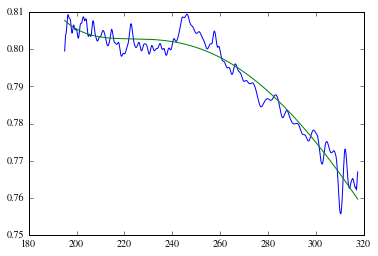

In [439]:
# compare with the SECT-corrected spectrum
raw_ratio = flux_cont/flux_ssw_cor_cont
plt.plot(wl_cont, raw_ratio)
from scipy.signal import savgol_filter
ratio_smooth = savgol_filter(raw_ratio, len(raw_ratio), 3)
from scipy.optimize import curve_fit
fit = np.polyfit(wl_cont, raw_ratio,1)
func = np.poly1d(fit)
plt.plot(wl_cont, ratio_smooth)
# plt.plot(np.hstack((wl_ssw_cor, wl_slw_cor)), func(np.hstack((wl_ssw_cor, wl_slw_cor))))
# plt.xlim([200,330])
# plt.ylim([0.75,0.85])

[  944.04644881   944.34624407   944.64603632 ...,  1567.31497265
  1567.61476367  1567.9145546 ]


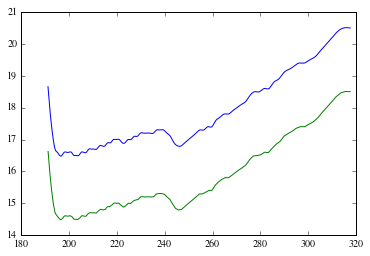

In [132]:
# read in the SSW beam profile
wl_ssw_beam, diam_ssw_beam = np.genfromtxt('/Users/yaolun/test/SSW_beam_profile.txt').T
freq_ssw_beam = c/wl_ssw_beam/1e5
print freq_ssw_beam
freq = []
diam = []
for i in range(len(freq_ssw_beam)):
    if i % 20 == 0:
        freq.append(freq_ssw_beam[i])
        diam.append(diam_ssw_beam[i])
plt.plot(wl_ssw_beam, diam_ssw_beam)
plt.plot(c/np.array(freq)/1e5, np.array(diam)-2)

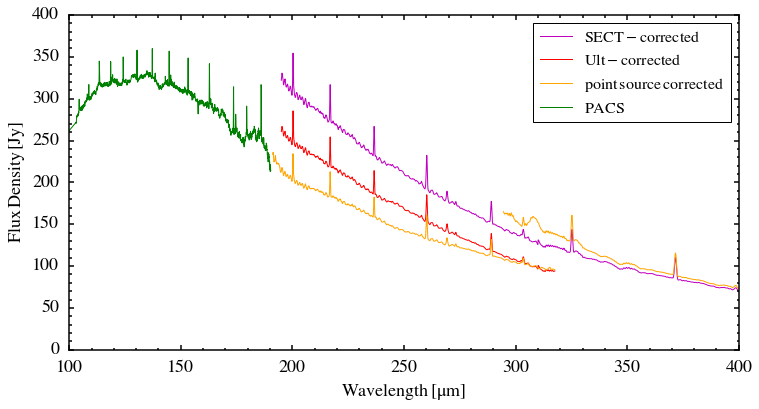

In [441]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
# ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

# ax.plot(wl_ssw_wsum, flux_ssw_wsum, 'k-', label=r'$\rm{weighted\,sum\,SSW}$')
# ax.plot(wl_cont, flux_cont, 'k-', label=r'$\rm{weighted\,sum\,SSW}$')

# ax.plot(wl_ssw_cor_cont, flux_ssw_cor_cont, 'm-', label=r'$\rm{SECT-corrected}$')

ax.plot(wl_cor_raw, flux_cor_raw, 'm-', label=r'$\rm{SECT-corrected}$')

ax.plot(wl_ssw_cor_trim, flux_ssw_cor_trim*ratio_smooth, color='Red', linestyle='-', label=r'$\rm{Ult-corrected}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, '-', color='Orange', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, '-', color='Orange')
# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 400])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_sum.pdf',format='pdf',dpi=300, bbox_inches='tight')

### Return the weight of each spaxel

In [106]:
x0 = ra_dum
y0 = dec_dum
r0 = 18.
print (x0**2+y0**2)**0.5

31.4201625195


In [105]:

# map a 70" x 70" grid
w = 0.0
g2d = np.empty((701,701))
dA = (1/((len(g2d[:,0])-1)/2.)*35.)**2
for i in range(len(g2d[:,0])):
    for j in range(len(g2d[0,:])):
        x_dum = ((len(g2d[:,0])-1)/2. - i)/((len(g2d[:,0])-1)/2.)*35.
        y_dum = ((len(g2d[:,0])-1)/2. - j)/((len(g2d[:,0])-1)/2.)*35.
        g2d[i,j] = gauss2d(x_dum, y_dum)
        if (x_dum-x0)**2+(y_dum-y0)**2 <= r0**2:
            w += gauss2d(x_dum, y_dum)*dA
print w

0.0942283545913


In [82]:
r = np.arange(0,301,1)
r = (r - len(r)/2.)/(len(r)/2.) * 35.
print w

0.190649762548
